Data comes from [U.S BUREAU OF LABOR STATISTICS](https://data.bls.gov/timeseries/CUUR0000SA0?output_view=pct_1mth)<br/>
by: [Renato](https://github.com/RBarroco)

<b>Sections required in your report:</b>

1) Brief description of the data set and a summary of its attributes <br/>
2) Initial plan for data exploration<br/>
3) Actions taken for data cleaning and feature engineering<br/>
4) Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner<br/>
5) Formulating at least 3 hypothesis about this data<br/>
6) Conducting a formal significance test for one of the hypotheses and discuss the results<br/>
7) Suggestions for next steps in analyzing this data<br/>
8) A paragraph that summarizes the quality of this data set and a request for additional data if needed<br/>

In [230]:
import pandas as pd
import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
# tells python to actually display the graphs

In [6]:
import requests
import json
import prettytable

headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CUUR0000SA0','SUUR0000SA0'],"startyear":"2011", "endyear":"2014"})
p = requests.post('https://api.bls.gov/publicAPI/v1/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)
for series in json_data['Results']['series']:
    x=prettytable.PrettyTable(["series id","year","period","value","footnotes"])
    seriesId = series['seriesID']
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
        footnotes=""
        for footnote in item['footnotes']:
            if footnote:
                footnotes = footnotes + footnote['text'] + ','

In [22]:
series

{'seriesID': 'SUUR0000SA0',
 'data': [{'year': '2014',
   'period': 'M12',
   'periodName': 'December',
   'value': '134.207',
   'footnotes': [{}]},
  {'year': '2014',
   'period': 'M11',
   'periodName': 'November',
   'value': '135.107',
   'footnotes': [{}]},
  {'year': '2014',
   'period': 'M10',
   'periodName': 'October',
   'value': '135.891',
   'footnotes': [{}]},
  {'year': '2014',
   'period': 'M09',
   'periodName': 'September',
   'value': '136.211',
   'footnotes': [{}]},
  {'year': '2014',
   'period': 'M08',
   'periodName': 'August',
   'value': '136.127',
   'footnotes': [{}]},
  {'year': '2014',
   'period': 'M07',
   'periodName': 'July',
   'value': '136.392',
   'footnotes': [{}]},
  {'year': '2014',
   'period': 'M06',
   'periodName': 'June',
   'value': '136.433',
   'footnotes': [{}]},
  {'year': '2014',
   'period': 'M05',
   'periodName': 'May',
   'value': '136.216',
   'footnotes': [{}]},
  {'year': '2014',
   'period': 'M04',
   'periodName': 'April',
  

#### 1) Brief description of the data set and a summary of its attributes <br/>


Data from 2011-2014, monthly, for the "CPI for all Urban consumers CPI-U"<br/>

We basically have a list of five features objects, that I'm only interested in:<br/>

"year":<br/>
"periodName":<br/>
"value":<br/>

In [361]:
series['data']

[{'year': '2014',
  'period': 'M12',
  'periodName': 'December',
  'value': '134.207',
  'footnotes': [{}]},
 {'year': '2014',
  'period': 'M11',
  'periodName': 'November',
  'value': '135.107',
  'footnotes': [{}]},
 {'year': '2014',
  'period': 'M10',
  'periodName': 'October',
  'value': '135.891',
  'footnotes': [{}]},
 {'year': '2014',
  'period': 'M09',
  'periodName': 'September',
  'value': '136.211',
  'footnotes': [{}]},
 {'year': '2014',
  'period': 'M08',
  'periodName': 'August',
  'value': '136.127',
  'footnotes': [{}]},
 {'year': '2014',
  'period': 'M07',
  'periodName': 'July',
  'value': '136.392',
  'footnotes': [{}]},
 {'year': '2014',
  'period': 'M06',
  'periodName': 'June',
  'value': '136.433',
  'footnotes': [{}]},
 {'year': '2014',
  'period': 'M05',
  'periodName': 'May',
  'value': '136.216',
  'footnotes': [{}]},
 {'year': '2014',
  'period': 'M04',
  'periodName': 'April',
  'value': '135.771',
  'footnotes': [{}]},
 {'year': '2014',
  'period': 'M03',


In [14]:
type(series['data'])

list

#### 2) Initial plan for data exploration<br/>

a. Explore descriptive statistics<br/>
b. Explore inferential statistics<br/>


#### 3) Actions taken for data cleaning and feature engineering<br/>

Since we have 5 features and we only need 3, the idea is clean the data.<br/>

a. Bring the data from the source and transform the format of the data<br/>
b. Substitute the list of objects for a DataFrame<br/>
c. Explore different ways to deal with the timeseries format of the date<br/>




In [18]:
series['data'][0]['value']

'134.207'

In [23]:
series['data'][1]

{'year': '2014',
 'period': 'M11',
 'periodName': 'November',
 'value': '135.107',
 'footnotes': [{}]}

In [263]:
row_pd = pd.concat([pd.DataFrame([i], columns=['year', 'periodName', 'value']) for i in series['data']], ignore_index=True)
row_pd.head()

,year,periodName,value
0,2014,December,134.207
1,2014,November,135.107
2,2014,October,135.891
3,2014,September,136.211
4,2014,August,136.127


In [352]:
row_pd.shape

(48, 3)

In [264]:
row_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        48 non-null     object
 1   periodName  48 non-null     object
 2   value       48 non-null     object
dtypes: object(3)
memory usage: 1.2+ KB


In [265]:
row_pd['year'] = row_pd['year'].astype(int)
row_pd['value'] = row_pd['value'].astype(float)

In [266]:
row_pd['periodName'] = pd.to_datetime(row_pd['periodName'], format='%B')
row_pd['periodName'] = row_pd['periodName'].dt.month

In [267]:
# row_pd = row_pd.coluns({'periodName': 'month'}, inplace=True)
row_pd.columns = ['year', 'month', 'value']
row_pd

,year,month,value
0,2014,12,134.207
1,2014,11,135.107
2,2014,10,135.891
3,2014,9,136.211
4,2014,8,136.127
5,2014,7,136.392
6,2014,6,136.433
7,2014,5,136.216
8,2014,4,135.771
9,2014,3,135.375


In [268]:
row_pd_reverse = row_pd.iloc[::-1]
row_pd_reverse

,year,month,value
47,2011,1,126.778
46,2011,2,127.363
45,2011,3,128.585
44,2011,4,129.483
43,2011,5,129.999
42,2011,6,129.846
41,2011,7,129.983
40,2011,8,130.351
39,2011,9,130.635
38,2011,10,130.373


#### 4) Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner <br/>

a. Explore descriptive statistics <br/>
b. Explore inferential statistics <br/>

##### Some basic visualization

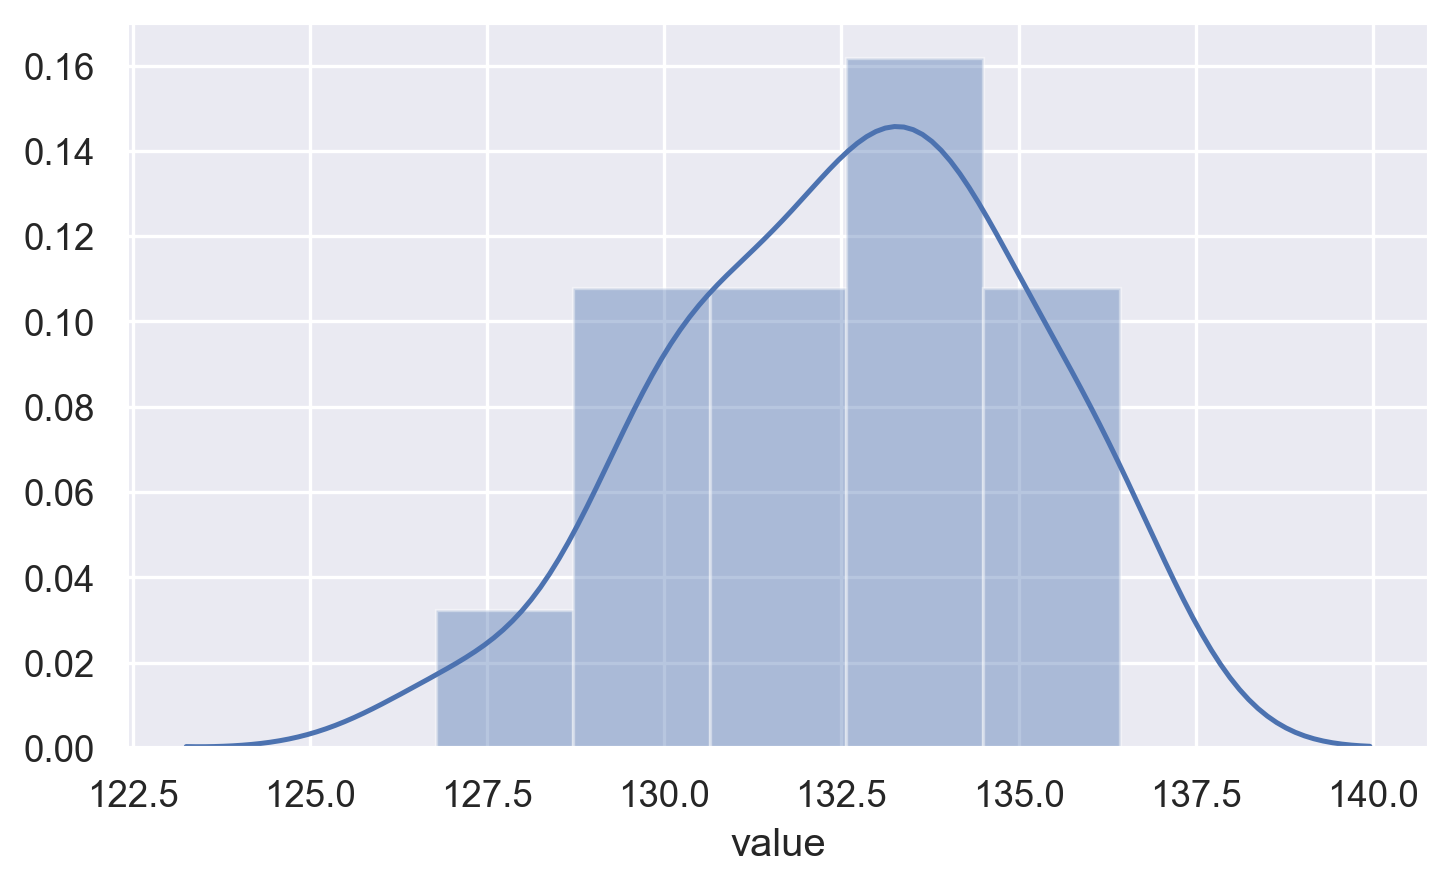

In [328]:
sns.distplot(consumer_base['value']);

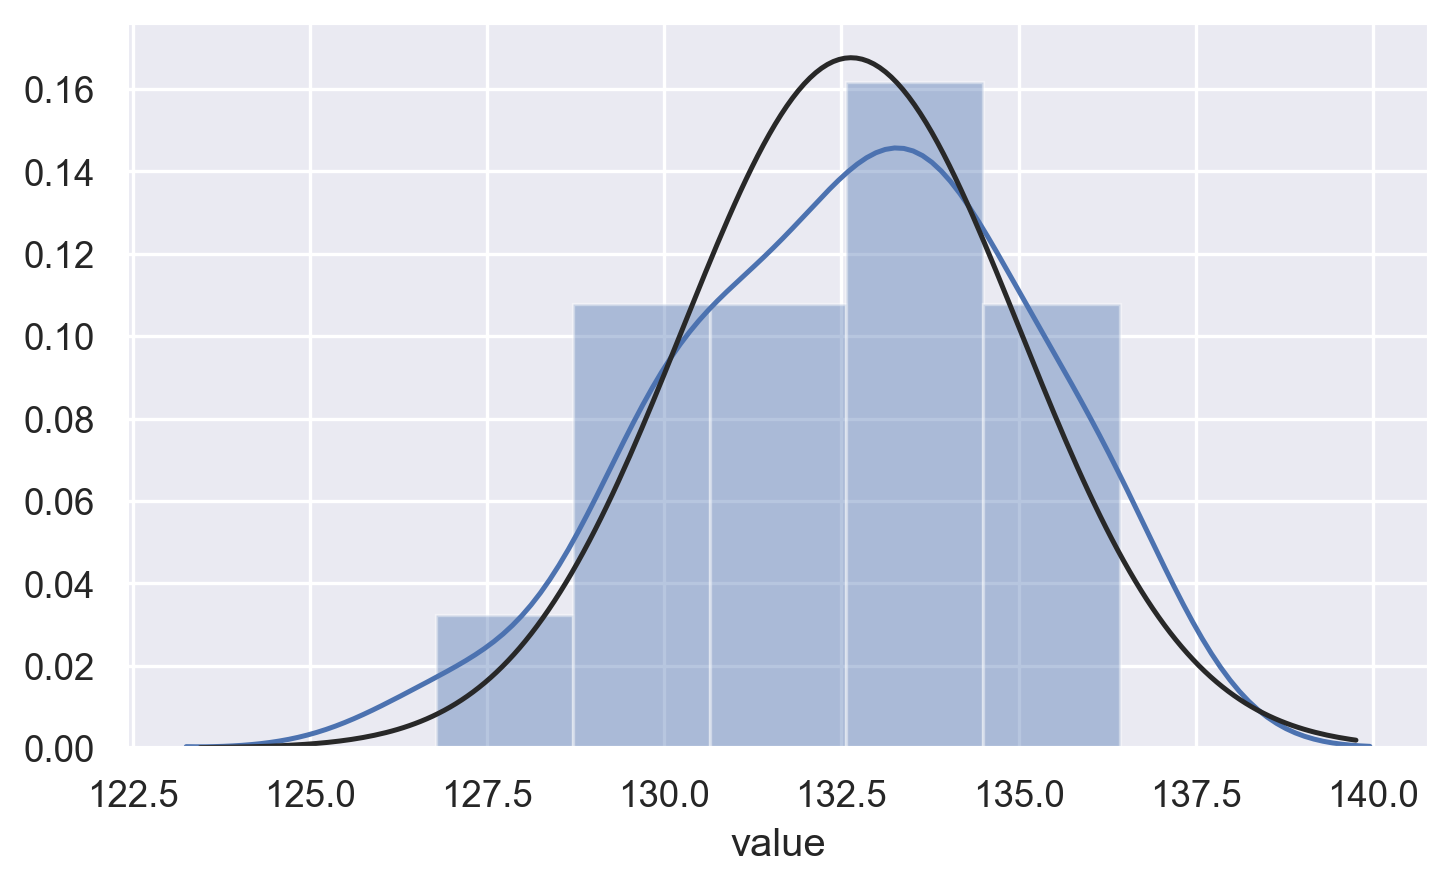

In [334]:
from scipy.stats import norm
sns.distplot(consumer_base['value'], fit=norm);

Here we can se that we have a distribution that is close to the normal, but not Normal.

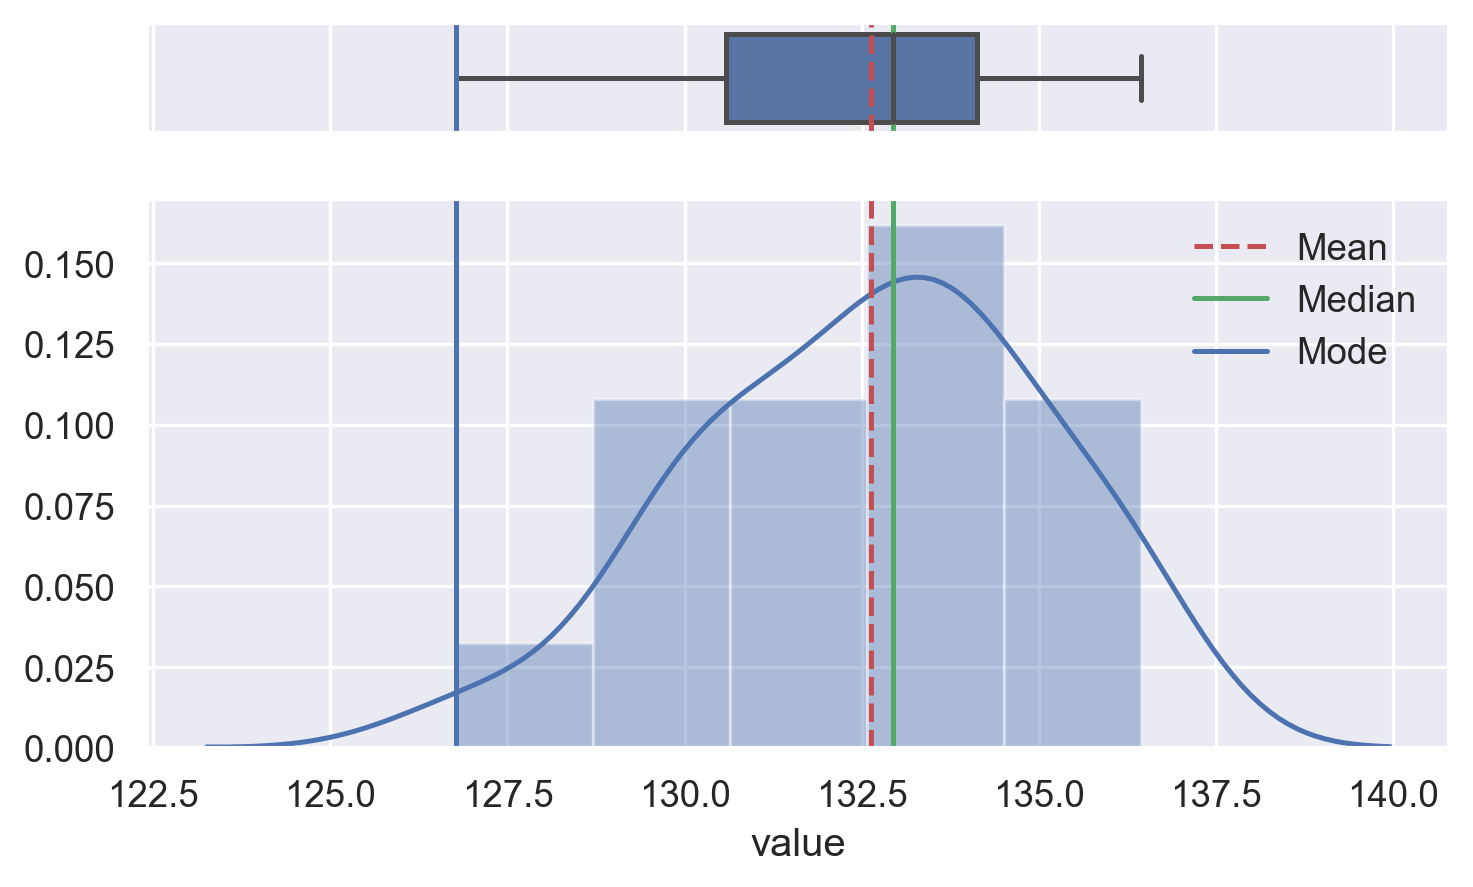

In [341]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=consumer_base['value'].mean()
median=consumer_base['value'].median()
mode=consumer_base['value'].mode().tolist()[0]

sns.boxplot(consumer_base['value'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(consumer_base['value'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()

#font:
#https://stackoverflow.com/questions/51417483/mean-median-mode-lines-showing-only-in-last-graph-in-seaborn

Here we can see that we have negative skewness, where the mean < median

In [270]:
consumer_base = row_pd_reverse.copy()

In [271]:
consumer_base_wide = consumer_base.pivot("year", "month", "value")
consumer_base_wide.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2011,126.778,127.363,128.585,129.483,129.999,129.846,129.983,130.351,130.635,130.373,130.196,129.844
2012,130.438,130.953,131.905,132.284,132.154,131.956,131.731,132.430,132.988,132.892,132.208,131.770
2013,132.137,133.204,133.558,133.421,133.626,133.900,133.919,134.098,134.255,133.876,133.596,133.509
2014,134.017,134.542,135.375,135.771,136.216,136.433,136.392,136.127,136.211,135.891,135.107,134.207


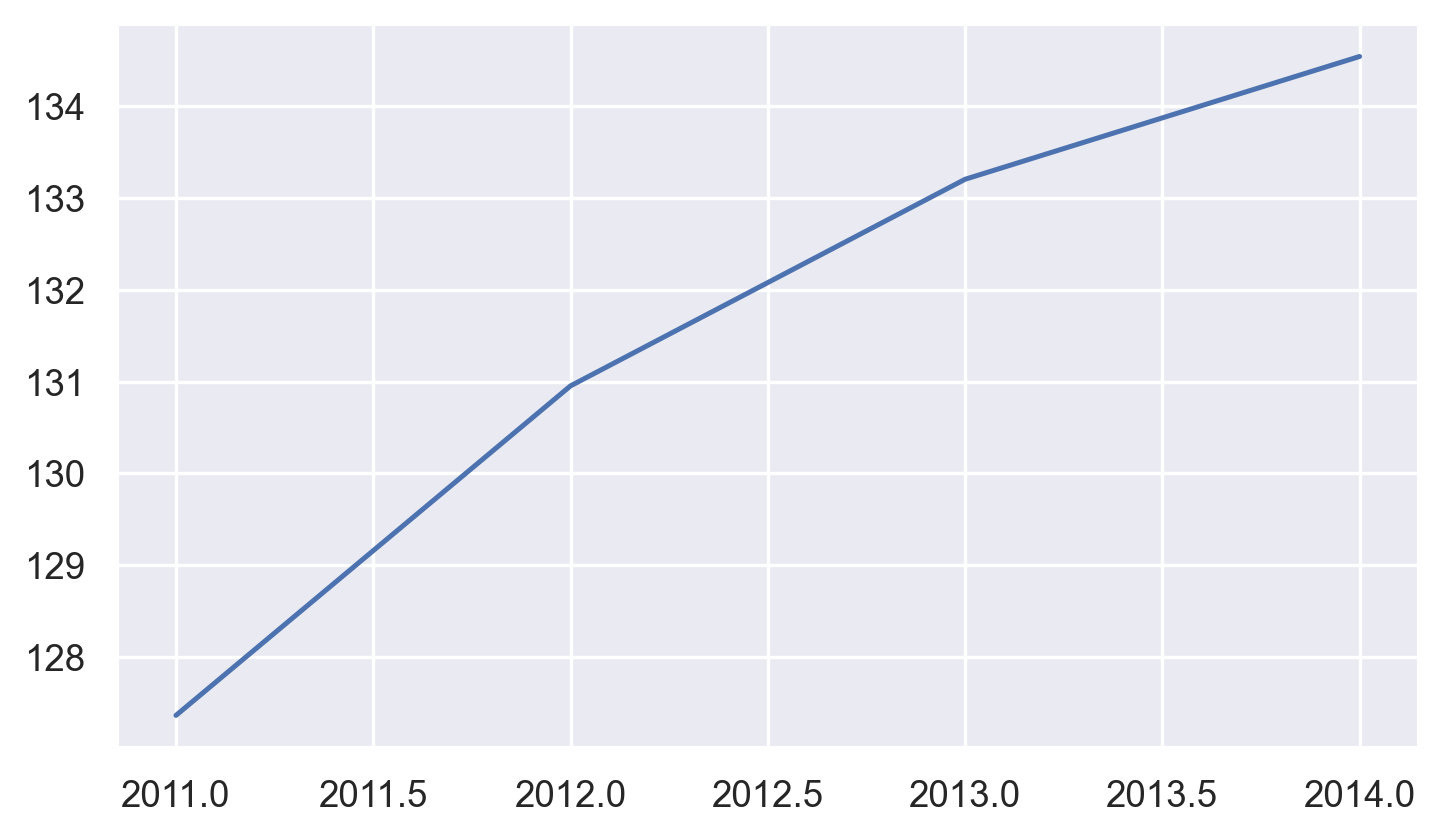

In [344]:
sns.lineplot(data=consumer_base_wide[2]); #february growth through the year, my birthday month :)

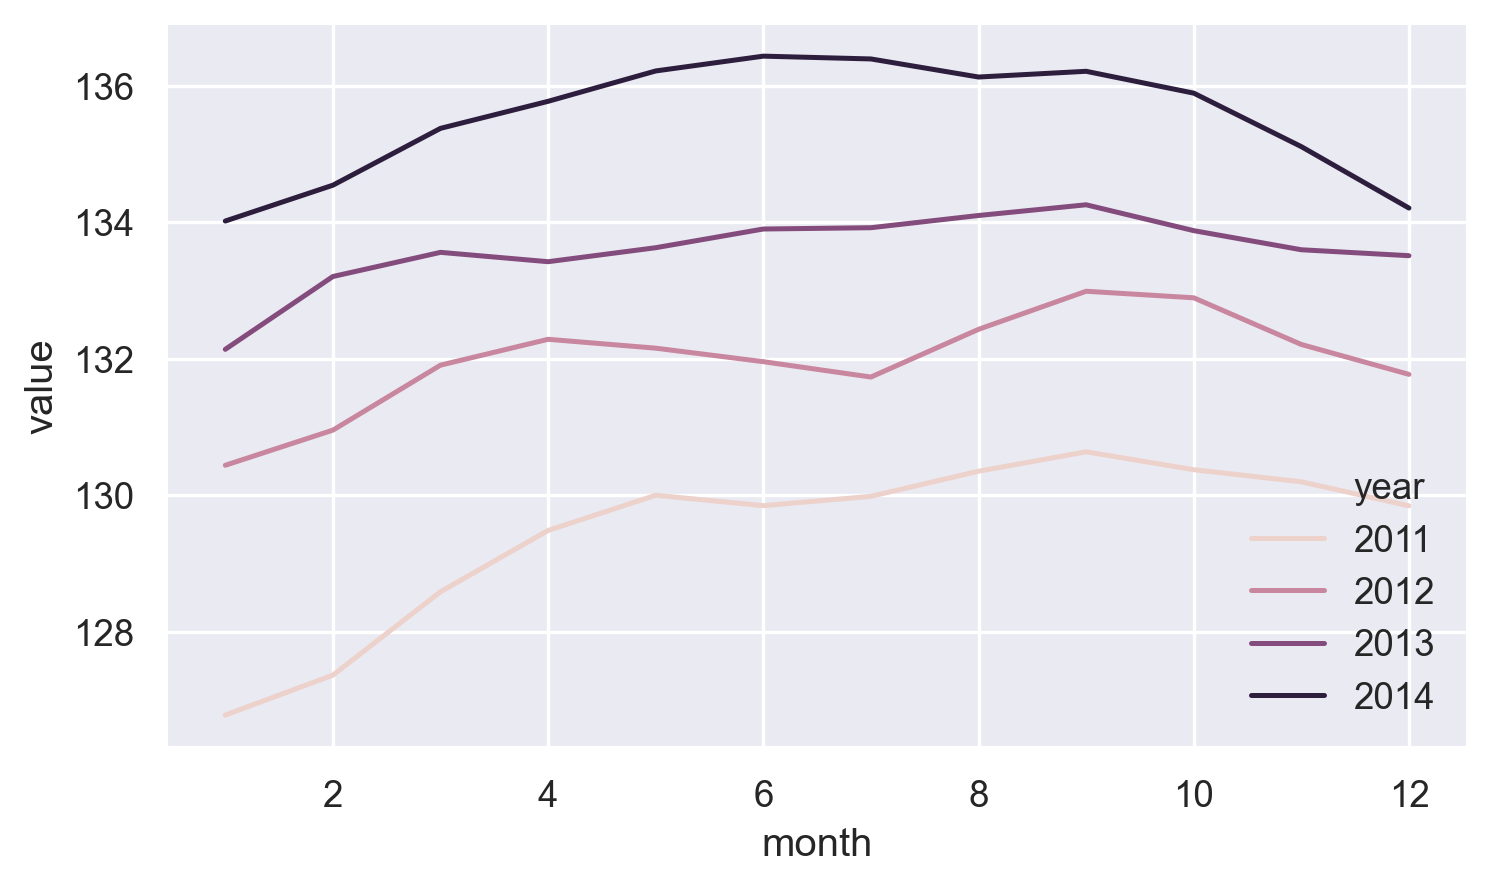

In [294]:
sns.lineplot(x="month", y="value", hue="year", markers=len(consumer_base['month'].drop_duplicates() <= 6),data=consumer_base);

In this graphic we can see a seasonality in the indicator, which is great!

In [297]:
consumer_base['value'].describe()

count     48.000000
mean     132.636104
std        2.405379
min      126.778000
25%      130.585750
50%      132.940000
75%      134.125250
max      136.433000
Name: value, dtype: float64

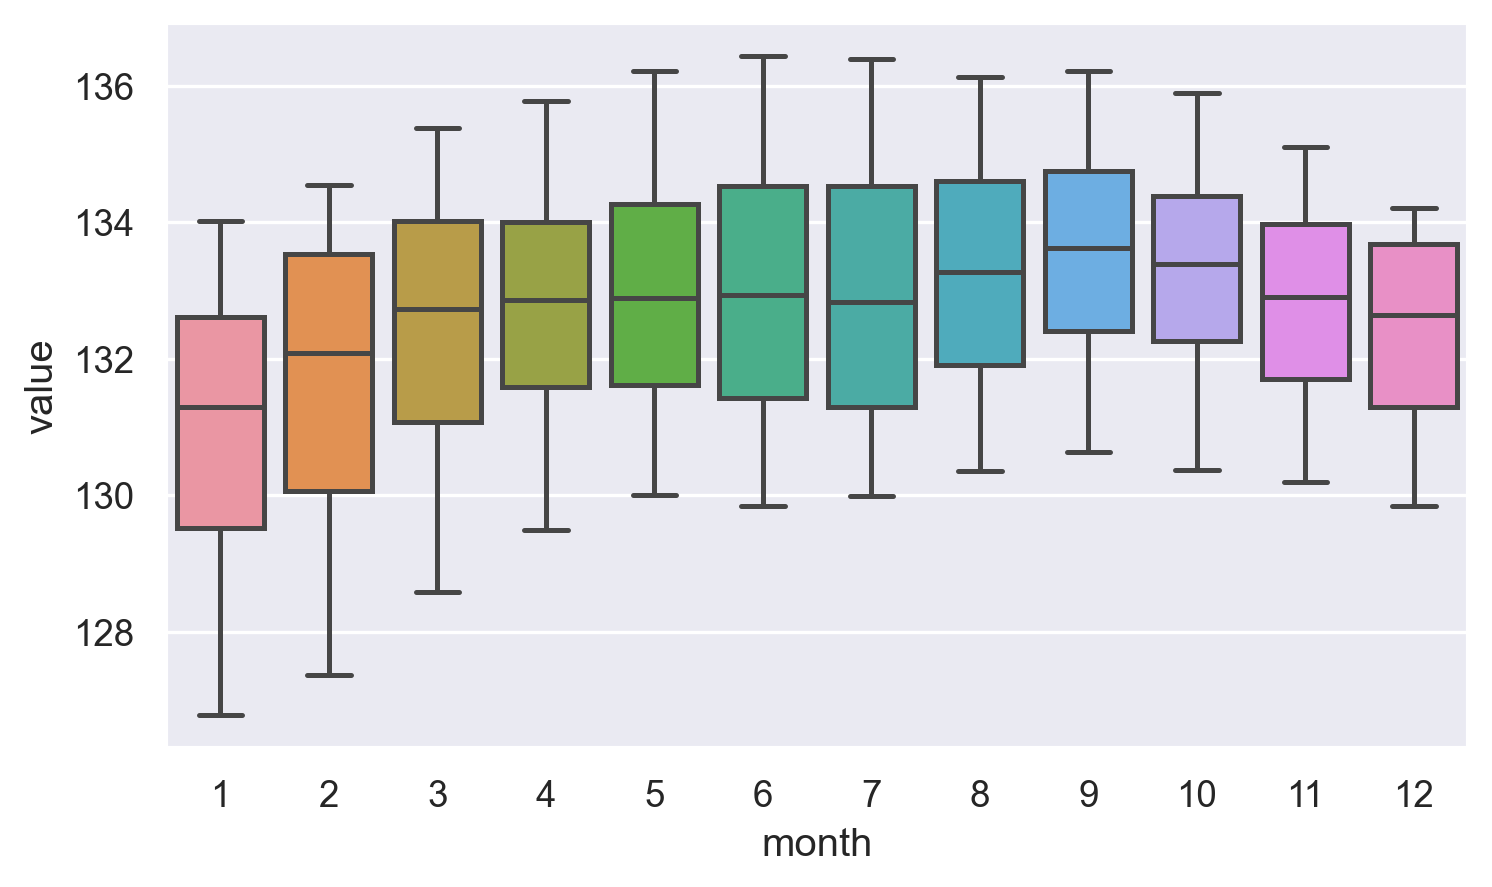

In [314]:
sns.boxplot(x="month", y='value', data=consumer_base);

With the boxplot kind of is possible to the the seasonality again, accross all months in all years

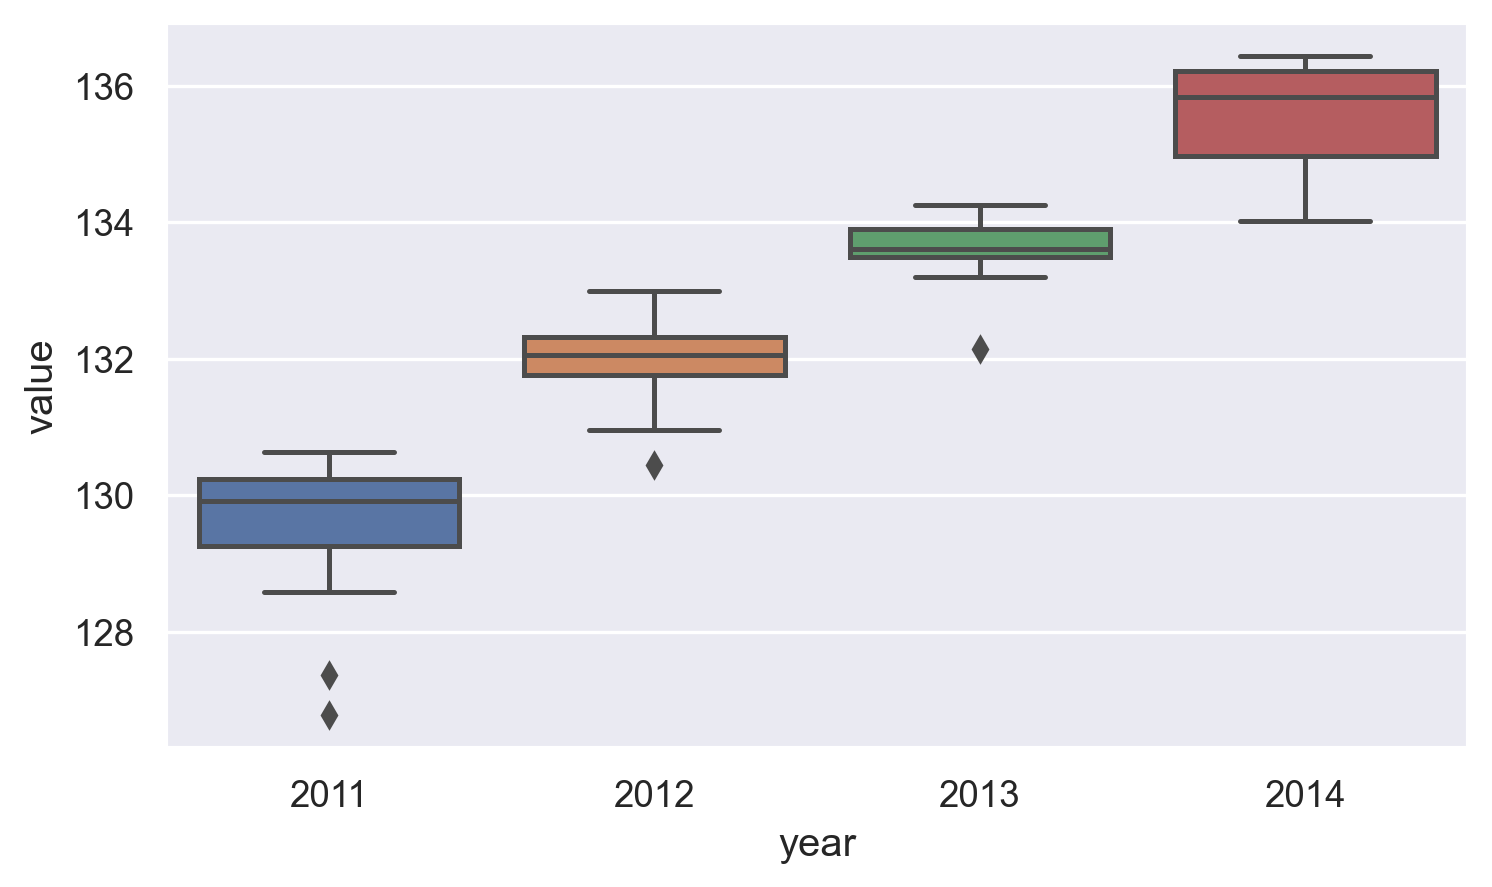

In [315]:
sns.boxplot(x="year", y='value', data=consumer_base);

On the graphic above we can find the years where the outliers were more present, something that was not possible to identify in the month boxplot graphic

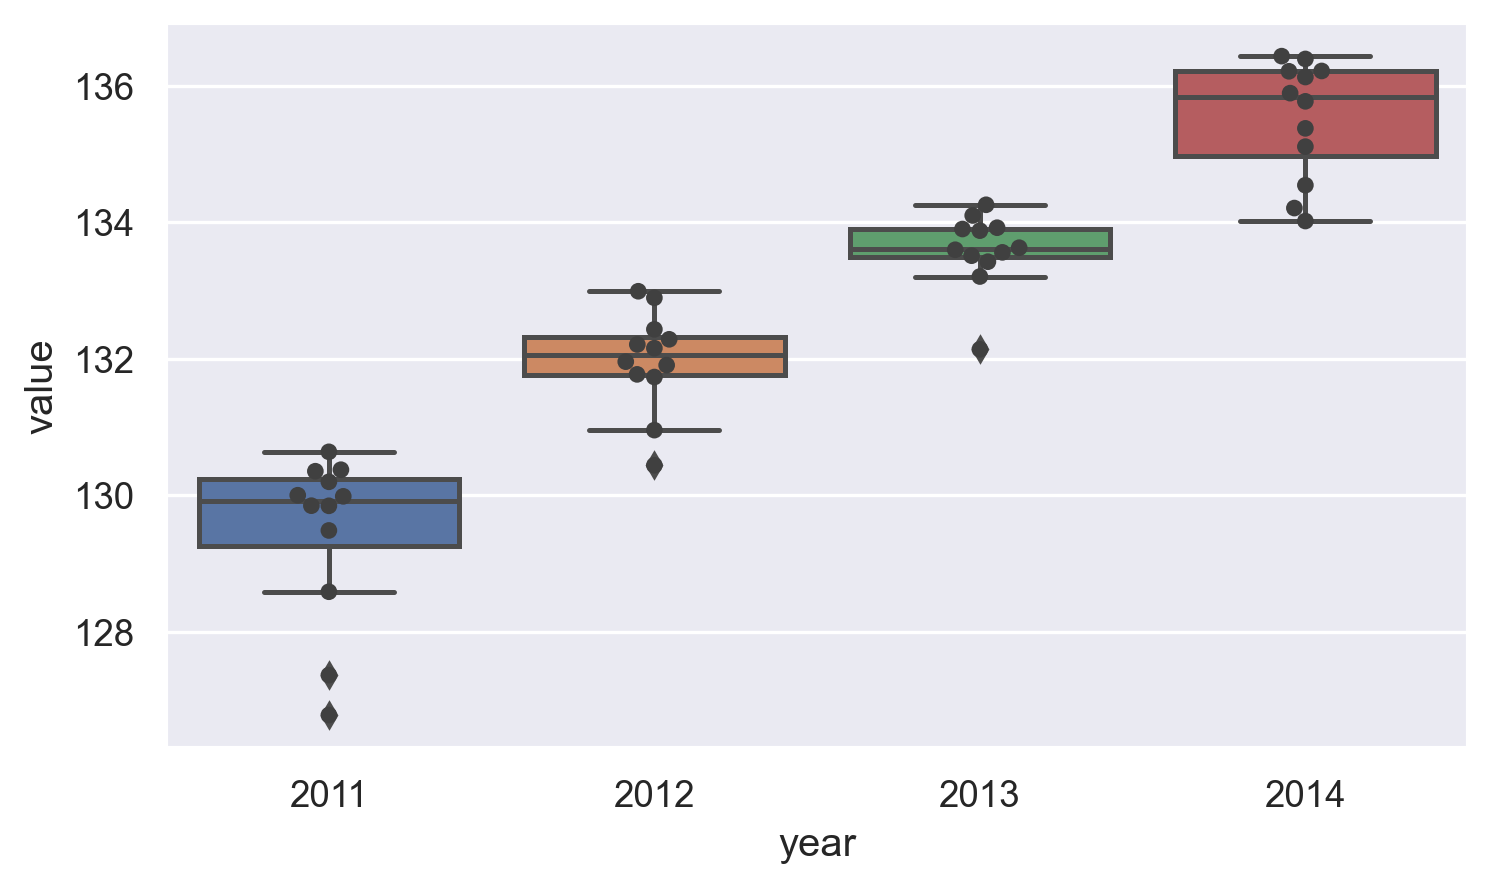

In [346]:
sns.boxplot(x="year", y='value', data=consumer_base);
sns.swarmplot(x="year", y="value", data=consumer_base, color=".25");

In [298]:
consumer_base['value'].mean()

132.63610416666668

In [301]:
# mode is always possible to have multi-values
consumer_base['value'].mode().head() 

0    126.778
1    127.363
2    128.585
3    129.483
4    129.844
dtype: float64

In [302]:
consumer_base['value'].median()

132.94

In [350]:
consumer_base['value'].std()

2.405378797431126

Comments:
    
1) Our consumer_base['value'] column has a negative skewness, where the mean < median;<br/>
2) We could find a seasonality in the timeseries;<br/>
3) The boxplot showed the difference between the medians for each month and each year;<br/>
4) The year boxplot provided us with the outliers, something that was not possible to identify in the month boxplot graphic;<br/>

#### 5) Formulating at least 3 hypothesis about this data
#### 6) Conducting a formal significance test for one of the hypotheses and discuss the results¶

[Test hypothesis](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/)

Assumptions:<br/>

Observations in each sample are independent and identically distributed (iid).
Interpretation<br/>

H0: the sample has a Gaussian distribution.<br/>
H1: the sample does not have a Gaussian distribution.<br/>

In [355]:
# Example of the Shapiro-Wilk Normality Test - CLOSE ENOUGH;
from scipy.stats import shapiro
stat, p = shapiro(consumer_base['value'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.968, p=0.202
Probably Gaussian


In [356]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
stat, p = normaltest(consumer_base['value'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=1.311, p=0.519
Probably Gaussian


Chi-Squared Test<br/>
Tests whether two categorical variables are related or independent.<br/>

Assumptions<br/>

Observations used in the calculation of the contingency table are independent.<br/>
25 or more examples in each cell of the contingency table.<br/>
Interpretation<br/>

H0: the two samples are independent.<br/>
H1: there is a dependency between the samples.<br/>


In [358]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = [consumer_base['year'],consumer_base['value']]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=1.815, p=1.000
Probably independent


Augmented Dickey-Fuller Unit Root Test<br/>
Tests whether a time series has a unit root, e.g. has a trend or more generally is autoregressive.<br/>

Assumptions<br/>

Observations in are temporally ordered.<br/>
Interpretation<br/>

H0: a unit root is present (series is non-stationary).<br/>
H1: a unit root is not present (series is stationary).<br/>

In [359]:
# Example of the Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller
data = consumer_base['value']
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

stat=-2.196, p=0.208
Probably not Stationary


#### 7) Suggestions for next steps in analyzing this data


Suggestions:<br/>
<br/>
1) To cross the CPI with the actual volume of unemployment vs. employment to arrive to a better conclusion of seasonality;<br/>
2) To do an analysis by State;<br/>
3) Or to cross the CPI, with the PPI to explore better the effects over CPI;<br/>

#### 8) A paragraph that summarizes the quality of this data set and a request for additional data if needed

The dataset is a timeseries, a short timeseries. It would be great to have a large number of data, 100 years. However, it is super interesting to see seasonality in the data and I'm super excited to check if the seasonality has any relation to the work envinroment in each State individually.